Building a semantic space and a DISCO network graph for the word "Innovation"

##### Step 1 - Install Neccessary Libraries

In [ ]:
pip install transformers
pip install torch
pip install numpy
pip install matplotlib
pip install networkx


##### Step 2 - Load Pre-trained BERT Model and Tokenizer

In [4]:
import torch
from transformers import BertModel, BertTokenizer

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Ensure the model is in evaluation mode
model.eval()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

##### Step 3 - Vectorizing the Corpus Using BERT Model

In [9]:
import json
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel

def vectorize_bert(input_file_path, output_file_path):
    # Load the tokenized text from the JSON file
    with open(input_file_path, 'r') as file:
        tokenized_texts = json.load(file)
    
    # Initialize BERT model and tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    # Ensure the model is in evaluation mode
    model.eval()

    # Function to get BERT embeddings
    def get_bert_embedding(tokens):
        # Tokenize and create tensor
        inputs = tokenizer(tokens, return_tensors='pt', is_split_into_words=True, padding=True, truncation=True)
        with torch.no_grad():
            outputs = model(**inputs)
        # Get the embeddings from the last hidden state
        embeddings = outputs.last_hidden_state
        # Take the mean of the token embeddings to get a sentence-level embedding
        sentence_embedding = torch.mean(embeddings, dim=1)
        return sentence_embedding.squeeze().numpy()

    # Process each tokenized text and get embeddings
    embeddings = []
    for tokens in tokenized_texts:
        embedding = get_bert_embedding(tokens)
        embeddings.append(embedding)

    # Convert embeddings to DataFrame and save as CSV
    df = pd.DataFrame(embeddings)
    df.to_csv(output_file_path, index=False)

# Example usage
input_file_path = 'tokenizedBERT_500.json'
output_file_path = 'vectorizedBERT_500.csv'
vectorize_bert(input_file_path, output_file_path)

##### Step 4 - Build the Semantic Space

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def pca_bert(input_file_path, output_file_path, n_components=2):
    # Load the embeddings
    embeddings = pd.read_csv(input_file_path)
    
    # Normalize the data
    scaler = StandardScaler()
    embeddings_scaled = scaler.fit_transform(embeddings)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    embeddings_pca = pca.fit_transform(embeddings_scaled)
    
    # Convert the result to a DataFrame
    embeddings_pca_df = pd.DataFrame(embeddings_pca, columns=[f'PC{i+1}' for i in range(n_components)])
    
    # Save the PCA results to a CSV file
    embeddings_pca_df.to_csv(output_file_path, index=False)

# Example usage for Word2Vec
input_file_path_word2vec = 'vectorized_word2vec_500.csv'
output_file_path_word2vec_pca = 'pca_word2vec_500.csv'
pca_bert(input_file_path_word2vec, output_file_path_word2vec_pca)

##### Step 4 - Build the Semantic Space

In [10]:
from sklearn.decomposition import PCA

# Reduce dimensions using PCA
embeddings = pd.read_csv('vectorizedBERT_500.csv')
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)


##### Step 5 - Visualize the Sementic Space

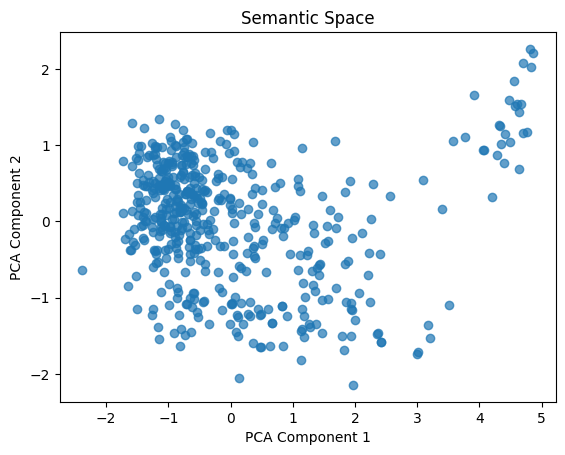

In [11]:
import matplotlib.pyplot as plt

# Plot the semantic space
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7)
plt.title('Semantic Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
